In [2]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Modelling

In [3]:
# Load the df_merged DataFrame from the pickle file
with open('df_merged.pkl', 'rb') as f:
    df_merged = pickle.load(f)

# Print the first few rows of the loaded DataFrame to verify
print(df_merged.head())

        date   vixo   vixh   vixl    vix   vxno   vxnh   vxnl    vxn   vxdo  \
0 2004-11-18  13.22  13.29  12.96  12.98  18.55  19.03  18.44  18.79  12.12   
1 2004-11-19  12.79  13.83  12.77  13.50  18.63  19.73  18.32  19.72  12.12   
2 2004-11-22  13.71  13.71  12.94  12.97  19.98  20.07  18.72  18.77  12.39   
3 2004-11-23  12.78  12.91  12.57  12.67  18.82  18.97  18.35  18.43  11.84   
4 2004-11-24  12.58  12.89  12.56  12.72  18.22  18.28  17.73  17.88  11.57   

   ...    b2ret     b2ind     b1ret     b1ind    t90ret    t90ind    t30ret  \
0  ... -0.00572  1104.611 -0.002025  1030.445  0.001474  828.7477  0.001541   
1  ... -0.00572  1104.611 -0.002025  1030.445  0.001474  828.7477  0.001541   
2  ... -0.00572  1104.611 -0.002025  1030.445  0.001474  828.7477  0.001541   
3  ... -0.00572  1104.611 -0.002025  1030.445  0.001474  828.7477  0.001541   
4  ... -0.00572  1104.611 -0.002025  1030.445  0.001474  828.7477  0.001541   

     t30ind    cpiret  cpiind  
0  689.9246  0.000

### Feature Engineering

In [4]:
df_merged.columns.tolist()

['date',
 'vixo',
 'vixh',
 'vixl',
 'vix',
 'vxno',
 'vxnh',
 'vxnl',
 'vxn',
 'vxdo',
 'vxdh',
 'vxdl',
 'vxd',
 'exratd_fromUSD_df_eur',
 'exratd_toUSD_df_eur',
 'exratd_fromUSD_df_jpy',
 'exratd_toUSD_df_jpy',
 'exratd_fromUSD_df_gbp',
 'exratd_toUSD_df_gbp',
 'exratd_fromUSD_df_chf',
 'exratd_toUSD_df_chf',
 'exratd_fromUSD_df_cny',
 'exratd_toUSD_df_cny',
 'BIDLO_df_spy',
 'ASKHI_df_spy',
 'PRC_df_spy',
 'VOL_df_spy',
 'BID_df_spy',
 'ASK_df_spy',
 'OPENPRC_df_spy',
 'BIDLO_df_qqq',
 'ASKHI_df_qqq',
 'PRC_df_qqq',
 'VOL_df_qqq',
 'BID_df_qqq',
 'ASK_df_qqq',
 'OPENPRC_df_qqq',
 'BIDLO_df_oih',
 'ASKHI_df_oih',
 'PRC_df_oih',
 'VOL_df_oih',
 'BID_df_oih',
 'ASK_df_oih',
 'OPENPRC_df_oih',
 'BIDLO_df_iyr',
 'ASKHI_df_iyr',
 'PRC_df_iyr',
 'VOL_df_iyr',
 'BID_df_iyr',
 'ASK_df_iyr',
 'OPENPRC_df_iyr',
 'BIDLO_df_lqd',
 'ASKHI_df_lqd',
 'PRC_df_lqd',
 'VOL_df_lqd',
 'BID_df_lqd',
 'ASK_df_lqd',
 'OPENPRC_df_lqd',
 'BIDLO_df_tlt',
 'ASKHI_df_tlt',
 'PRC_df_tlt',
 'VOL_df_tlt',
 'BID_d

In [5]:
# Calculate the 7 and 21 day moving averages, daily percent changes, and the 0,5,10,30,44-day movements for the ETFs
columns_to_calculate = ['df_oih', 'df_spy', 'df_qqq', 'df_iyr', 'df_lqd', 'df_tlt', 'df_tip', 'df_gld']

for column in columns_to_calculate:
    df_merged[f'{column}_7d_ma'] = df_merged[f'PRC_{column}'].rolling(window=7).mean()
    df_merged[f'{column}_21d_ma'] = df_merged[f'PRC_{column}'].rolling(window=21).mean()
    df_merged[f'{column}_pct_change'] = (df_merged[f'PRC_{column}'] - df_merged[f'OPENPRC_{column}']) / df_merged[f'PRC_{column}']
    for days in [0, 5, 10, 30, 44]:
        df_merged[f'{column}_{days}d_movement'] = np.where(
            df_merged[f'OPENPRC_{column}'].notna() & df_merged[f'PRC_{column}'].shift(-days).notna(),
            np.where(df_merged[f'OPENPRC_{column}'] < df_merged[f'PRC_{column}'].shift(-days), 1,0),
            np.nan
        )

# Display the first few rows to verify the calculations
print(df_merged.head())

        date   vixo   vixh   vixl    vix   vxno   vxnh   vxnl    vxn   vxdo  \
0 2004-11-18  13.22  13.29  12.96  12.98  18.55  19.03  18.44  18.79  12.12   
1 2004-11-19  12.79  13.83  12.77  13.50  18.63  19.73  18.32  19.72  12.12   
2 2004-11-22  13.71  13.71  12.94  12.97  19.98  20.07  18.72  18.77  12.39   
3 2004-11-23  12.78  12.91  12.57  12.67  18.82  18.97  18.35  18.43  11.84   
4 2004-11-24  12.58  12.89  12.56  12.72  18.22  18.28  17.73  17.88  11.57   

   ...  df_tip_30d_movement  df_tip_44d_movement  df_gld_7d_ma  df_gld_21d_ma  \
0  ...                  1.0                  1.0           NaN            NaN   
1  ...                  0.0                  0.0           NaN            NaN   
2  ...                  0.0                  0.0           NaN            NaN   
3  ...                  0.0                  0.0           NaN            NaN   
4  ...                  0.0                  1.0           NaN            NaN   

   df_gld_pct_change  df_gld_0d_moveme

In [6]:
# Filter columns containing 'qqq'
qqq_columns = [col for col in df_merged.columns if 'qqq' in col]

# Select specific columns
selected_columns = ['OPENPRC_df_qqq', 'PRC_df_qqq'] + [col for col in qqq_columns if 'qqq' and 'movement' in col]

# Print the first 10 rows of these columns
print(df_merged[selected_columns].tail(30))

      OPENPRC_df_qqq  PRC_df_qqq  df_qqq_0d_movement  df_qqq_5d_movement  \
4957       475.17001   481.26999                 1.0                 1.0   
4958       480.35001   480.26001                 0.0                 0.0   
4959       481.04999   482.50000                 1.0                 0.0   
4960       484.84000   474.85001                 0.0                 0.0   
4961       479.23999   480.00000                 1.0                 0.0   
4962       479.45001   475.34000                 0.0                 0.0   
4963       473.69000   476.76001                 1.0                 0.0   
4964       476.29001   471.35001                 0.0                 0.0   
4965       473.28000   470.66000                 0.0                 0.0   
4966       475.04001   476.26999                 1.0                 0.0   
4967       473.20001   461.81000                 0.0                 0.0   
4968       458.67001   460.60999                 1.0                 1.0   
4969       4

In [7]:
# Drop rows with NaN values
df_merged_cleaned = df_merged.dropna()

# Display the first few rows to verify the changes
print(df_merged_cleaned.shape)
print(df_merged_cleaned.columns)

(4779, 163)
Index(['date', 'vixo', 'vixh', 'vixl', 'vix', 'vxno', 'vxnh', 'vxnl', 'vxn',
       'vxdo',
       ...
       'df_tip_30d_movement', 'df_tip_44d_movement', 'df_gld_7d_ma',
       'df_gld_21d_ma', 'df_gld_pct_change', 'df_gld_0d_movement',
       'df_gld_5d_movement', 'df_gld_10d_movement', 'df_gld_30d_movement',
       'df_gld_44d_movement'],
      dtype='object', length=163)


In [20]:
def create_data(df, target_column, price_columns, columns=[], window_size=30):
    '''
    Creates data for the past window_size days
    df: DataFrame
    target_column: str
    columns: list
    window_size: int
    return: DataFrame, DataFrame, DataFrame
    '''
    
    X, y = [], []
    for i in range(window_size, len(df)):
        data = []
        for column in columns:
            data.extend(df[column].values[i-window_size:i])
        X.append(data)
        y.append(df[target_column].values[i])
    
    # Create column names for X
    column_names = []
    for column in columns:
        column_names.extend([f"{column}_{-j}" for j in range(window_size, 0, -1)])
    
    # Convert X and y to DataFrames
    X_df = pd.DataFrame(X, columns=column_names)
    y_df = pd.DataFrame(y, columns=[target_column])
    prices = df[price_columns][window_size:]
    
    return X_df, y_df, prices

### QQQ Daily Change as Output

In [21]:
# Get data
columns = df_merged_cleaned.select_dtypes(exclude=['datetime']).columns.tolist()
columns = [col for col in columns if 'movement' not in col]
X, y, prices = create_data(df_merged_cleaned, 'df_qqq_0d_movement', ['OPENPRC_df_qqq', 'PRC_df_qqq'], columns=columns, window_size=30)

In [11]:
X.head()

,vixo_-30,vixo_-29,vixo_-28,vixo_-27,vixo_-26,vixo_-25,vixo_-24,vixo_-23,vixo_-22,vixo_-21,...,df_gld_pct_change_-10,df_gld_pct_change_-9,df_gld_pct_change_-8,df_gld_pct_change_-7,df_gld_pct_change_-6,df_gld_pct_change_-5,df_gld_pct_change_-4,df_gld_pct_change_-3,df_gld_pct_change_-2,df_gld_pct_change_-1
0,12.34,12.26,11.78,11.42,11.41,11.53,12.25,11.61,12.25,12.42,...,0.002363,-0.009229,0.003077,0.009827,0.000701,-0.006866,0.002342,0.003285,-0.000468,0.000237
1,12.26,11.78,11.42,11.41,11.53,12.25,11.61,12.25,12.42,13.39,...,-0.009229,0.003077,0.009827,0.000701,-0.006866,0.002342,0.003285,-0.000468,0.000237,0.000238
2,11.78,11.42,11.41,11.53,12.25,11.61,12.25,12.42,13.39,14.01,...,0.003077,0.009827,0.000701,-0.006866,0.002342,0.003285,-0.000468,0.000237,0.000238,-0.001423
3,11.42,11.41,11.53,12.25,11.61,12.25,12.42,13.39,14.01,13.98,...,0.009827,0.000701,-0.006866,0.002342,0.003285,-0.000468,0.000237,0.000238,-0.001423,0.002879
4,11.41,11.53,12.25,11.61,12.25,12.42,13.39,14.01,13.98,14.09,...,0.000701,-0.006866,0.002342,0.003285,-0.000468,0.000237,0.000238,-0.001423,0.002879,-0.002894


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split the temporary set into cross-validation and test sets
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f'Training set size: {X_train.shape[0]}')
print(f'Cross-validation set size: {X_cv.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 3799
Cross-validation set size: 475
Test set size: 475


In [34]:
print('Training from ' + df_merged_cleaned['date'][30].strftime('%Y-%m-%d') + ' to ' + df_merged_cleaned['date'][X_train.shape[0]+30].strftime('%Y-%m-%d'))
print('Cross-validation from ' + df_merged_cleaned['date'][X_train.shape[0]+30].strftime('%Y-%m-%d') + ' to ' + df_merged_cleaned['date'][X_train.shape[0]+X_cv.shape[0]+30].strftime('%Y-%m-%d'))
print('Test from ' + df_merged_cleaned['date'][X_train.shape[0]+X_cv.shape[0]+30].strftime('%Y-%m-%d') + ' to ' + df_merged_cleaned['date'][X_train.shape[0]+X_cv.shape[0]+X_test.shape[0]+30].strftime('%Y-%m-%d'))

Training from 2005-01-03 to 2020-02-24
Cross-validation from 2020-02-24 to 2022-01-11
Test from 2022-01-11 to 2023-12-01


In [26]:
prices_train = prices.iloc[:X_train.shape[0]]
prices_cv = prices.iloc[X_train.shape[0]:X_train.shape[0]+X_cv.shape[0]]
prices_test = prices.iloc[-X_test.shape[0]:]

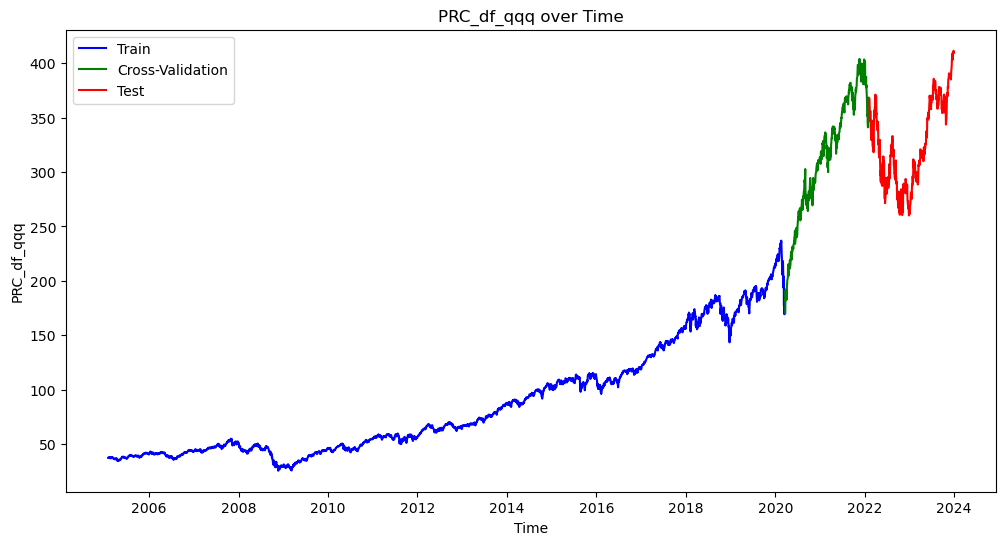

In [37]:
plt.figure(figsize=(12, 6))

# Plot PRC_df_qqq for prices_train
plt.plot(df_merged_cleaned['date'][30:X_train.shape[0]+30], prices_train['PRC_df_qqq'], label='Train', color='blue')

# Plot PRC_df_qqq for prices_cv
plt.plot(df_merged_cleaned['date'][X_train.shape[0]+30:X_train.shape[0]+X_cv.shape[0]+30], prices_cv['PRC_df_qqq'], label='Cross-Validation', color='green')

# Plot PRC_df_qqq for prices_test
plt.plot(df_merged_cleaned['date'][-X_test.shape[0]:], prices_test['PRC_df_qqq'], label='Test', color='red')

# Add title and labels
plt.title('PRC_df_qqq over Time')
plt.xlabel('Time')
plt.ylabel('PRC_df_qqq')

# Add legend
plt.legend()

# Save the figure
plt.savefig('PRC_df_qqq_over_time.png')

# Show the plot
plt.show()

In [14]:
def calculate_percentage(y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    percentages = {k: (v / total) * 100 for k, v in zip(unique, counts)}
    return percentages

# Calculate percentages for y_train, y_cv, and y_test
y_train_percentage = calculate_percentage(y_train)
y_cv_percentage = calculate_percentage(y_cv)
y_test_percentage = calculate_percentage(y_test)

print(f'y_train percentages: {y_train_percentage}')
print(f'y_cv percentages: {y_cv_percentage}')
print(f'y_test percentages: {y_test_percentage}')

y_train percentages: {0.0: 46.880758094235325, 1.0: 53.11924190576468}
y_cv percentages: {0.0: 43.78947368421053, 1.0: 56.21052631578948}
y_test percentages: {0.0: 45.89473684210526, 1.0: 54.10526315789473}


Let's first get a baseline result by using logistic regression.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the data
log_reg.fit(X_train, y_train)

# Predict the target values for training and cross-validation sets
y_train_pred = log_reg.predict(X_train)
y_cv_pred = log_reg.predict(X_cv)

# Calculate the accuracy for training and cross-validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Cross-Validation Accuracy: {cv_accuracy}')

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.6030534351145038
Cross-Validation Accuracy: 0.4905263157894737


/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Try more models:

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
nb = GaussianNB()
log_reg = make_pipeline(StandardScaler(), LogisticRegression())
svm =  make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=37))
dt = DecisionTreeClassifier(random_state=37)
rf = RandomForestClassifier(random_state=37)

models = {'knn': knn, 'nb': nb, 'log_reg': log_reg, 'svm': svm, 'dt': dt, 'rf': rf}

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Dictionary to store the results
results = {}

# Iterate over each model in the models set
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict the target values for the cross-validation set
    y_cv_pred = model.predict(X_cv)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    
    # Store the results in the dictionary
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion_matrix(y_cv, y_cv_pred)
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

In [27]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"         Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]}          {metrics['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]}          {metrics['confusion_matrix'][1, 1]}")
    print()

knn:
  Accuracy: 0.4737
  Precision: 0.5612
  Recall: 0.2921
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    147          61
Actual 1    189          78

nb:
  Accuracy: 0.5537
  Precision: 0.5647
  Recall: 0.8989
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    23          185
Actual 1    27          240

log_reg:
  Accuracy: 0.5179
  Precision: 0.5864
  Recall: 0.4831
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    117          91
Actual 1    138          129

svm:
  Accuracy: 0.4400
  Precision: 0.5556
  Recall: 0.0187
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    204          4
Actual 1    262          5

dt:
  Accuracy: 0.4779
  Precision: 0.5333
  Recall: 0.5693
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    75          133
Actual 1    115          152

rf:
  Accuracy: 0.4526
  Precision: 0.5294
  Recall: 0.2360
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    152         

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_cv, y_cv))

Epoch 1/50


/Users/charlieyang/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5218 - loss: 3066010.5000 - val_accuracy: 0.5095 - val_loss: 145863.8125
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5026 - loss: 315587.6250 - val_accuracy: 0.5642 - val_loss: 2531.7805
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 1870.0193 - val_accuracy: 0.5621 - val_loss: 0.6869
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5322 - loss: 35.4138 - val_accuracy: 0.5621 - val_loss: 0.6859
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5397 - loss: 28.0429 - val_accuracy: 0.5621 - val_loss: 0.6855
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5344 - loss: 29.7258 - val_accuracy: 0.5621 - val_loss: 0.6852
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5380 - loss: 16.1641 - val_accuracy: 0.5621 - val_loss: 0.6851
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - loss: 1.7777 - v

This is predicting everything as 1, not helpful.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize the models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Dictionary to store the models
discriminant_models = {'LDA': lda, 'QDA': qda}

# Dictionary to store the results
discriminant_results = {}

# Fit the models, predict, and calculate metrics
for model_name, model in discriminant_models.items():
    model.fit(X_train, y_train)
    y_cv_pred = model.predict(X_cv)
    
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    conf_matrix = confusion_matrix(y_cv, y_cv_pred)
    
    discriminant_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

In [28]:
# Print the results
for model_name, metrics in discriminant_results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"         Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]}          {metrics['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]}          {metrics['confusion_matrix'][1, 1]}")
    print()

LDA:
  Accuracy: 0.4442
  Precision: 0.5484
  Recall: 0.0637
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    194          14
Actual 1    250          17

QDA:
  Accuracy: 0.5221
  Precision: 0.5641
  Recall: 0.6592
  Confusion Matrix:
         Predicted 0  Predicted 1
Actual 0    72          136
Actual 1    91          176



Now, let's select some features:

In [29]:
rf.feature_importances_.shape

(3660,)

In [ ]:
# Get feature importances from the RandomForestClassifier
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(50))

                    Feature  Importance
3553  df_tip_pct_change_-17    0.001485
3006  df_oih_pct_change_-24    0.001450
3378  df_lqd_pct_change_-12    0.001423
3558  df_tip_pct_change_-12    0.001415
3387   df_lqd_pct_change_-3    0.001372
3282  df_iyr_pct_change_-18    0.001311
3641  df_gld_pct_change_-19    0.001276
3548  df_tip_pct_change_-22    0.001254
3281  df_iyr_pct_change_-19    0.001245
3095  df_spy_pct_change_-25    0.001223
3289  df_iyr_pct_change_-11    0.001216
3009  df_oih_pct_change_-21    0.001213
3379  df_lqd_pct_change_-11    0.001211
3019  df_oih_pct_change_-11    0.001209
3451  df_tlt_pct_change_-29    0.001207
3564   df_tip_pct_change_-6    0.001193
3295   df_iyr_pct_change_-5    0.001179
3118   df_spy_pct_change_-2    0.001169
3381   df_lqd_pct_change_-9    0.001165
3643  df_gld_pct_change_-17    0.001163
3372  df_lqd_pct_change_-18    0.001162
3639  df_gld_pct_change_-21    0.001161
757          VOL_df_spy_-23    0.001150
3279  df_iyr_pct_change_-21    0.001149


In [37]:
# Remove the last 4 characters from the feature names to group them
feature_importance_df['Grouped_Feature'] = feature_importance_df['Feature'].str[:-4]

# Group by the new feature names and sum the importances
grouped_feature_importance_df = feature_importance_df.groupby('Grouped_Feature')['Importance'].sum().reset_index()

# Sort the DataFrame by importance in descending order
grouped_feature_importance_df = grouped_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important grouped features
print(grouped_feature_importance_df.head(20))

       Grouped_Feature  Importance
230                vxn    0.020284
155  df_iyr_pct_change    0.019724
149  df_gld_pct_change    0.019229
185  df_tip_pct_change    0.019136
161  df_lqd_pct_change    0.019101
226                vxd    0.019029
167  df_oih_pct_change    0.018711
191  df_tlt_pct_change    0.018677
173  df_qqq_pct_change    0.018224
221                vix    0.018163
179  df_spy_pct_change    0.017930
103         VOL_df_oih    0.014378
97          VOL_df_gld    0.013865
109         VOL_df_tip    0.013256
111         VOL_df_tlt    0.013107
107         VOL_df_spy    0.012717
99          VOL_df_iyr    0.012299
105         VOL_df_qqq    0.011846
101         VOL_df_lqd    0.011439
228               vxdl    0.009299


In [46]:
# Keep the top 19 grouped features
top_19_grouped_features = grouped_feature_importance_df.head(19)['Grouped_Feature'].tolist()

# Filter the columns in X based on the top 19 grouped features
top_19_columns = [col for col in X.columns if any(feature in col for feature in top_19_grouped_features)]

# Create a new DataFrame with only the top 19 columns
X_top_19 = X[top_19_columns]
X_train_top_19 = X_train[top_19_columns]
X_cv_top_19 = X_cv[top_19_columns]

# Display the first few rows to verify
print(X_top_19.head())

   vixo_-30  vixo_-29  vixo_-28  vixo_-27  vixo_-26  vixo_-25  vixo_-24  \
0     12.34     12.26     11.78     11.42     11.41     11.53     12.25   
1     12.26     11.78     11.42     11.41     11.53     12.25     11.61   
2     11.78     11.42     11.41     11.53     12.25     11.61     12.25   
3     11.42     11.41     11.53     12.25     11.61     12.25     12.42   
4     11.41     11.53     12.25     11.61     12.25     12.42     13.39   

   vixo_-23  vixo_-22  vixo_-21  ...  df_gld_pct_change_-10  \
0     11.61     12.25     12.42  ...               0.002363   
1     12.25     12.42     13.39  ...              -0.009229   
2     12.42     13.39     14.01  ...               0.003077   
3     13.39     14.01     13.98  ...               0.009827   
4     14.01     13.98     14.09  ...               0.000701   

   df_gld_pct_change_-9  df_gld_pct_change_-8  df_gld_pct_change_-7  \
0             -0.009229              0.003077              0.009827   
1              0.003077     

In [47]:
knn2 = make_pipeline(StandardScaler(), KNeighborsClassifier())
nb2 = GaussianNB()
log_reg2 = make_pipeline(StandardScaler(), LogisticRegression())
svm2 =  make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=37))
dt2 = DecisionTreeClassifier(random_state=37)
rf2 = RandomForestClassifier(random_state=37)

models2= {'knn': knn2, 'nb': nb2, 'log_reg': log_reg2, 'svm': svm2, 'dt': dt2, 'rf': rf2}

In [48]:
# Dictionary to store the results
results2 = {}

# Iterate over each model in the models set
for model_name, model in models2.items():
    # Fit the model to the training data
    model.fit(X_train_top_19, y_train)
    
    # Predict the target values for the cross-validation set
    y_cv_pred = model.predict(X_cv_top_19)
    
    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_cv, y_cv_pred)
    precision = precision_score(y_cv, y_cv_pred)
    recall = recall_score(y_cv, y_cv_pred)
    
    # Store the results in the dictionary
    results2[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion_matrix(y_cv, y_cv_pred)
    }

/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlieyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

In [57]:
# Print the results
for (model_name, metrics), (model_name2, metrics2) in zip(results.items(), results2.items()):
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f} -> {metrics2['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f} -> {metrics2['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f} -> {metrics2['recall']:.4f}")
    print(f"  Confusion Matrix:")
    print(f"          Predicted 0  Predicted 1")
    print(f"Actual 0    {metrics['confusion_matrix'][0, 0]} -> {metrics2['confusion_matrix'][0, 0]}  {metrics['confusion_matrix'][0, 1]} -> {metrics2['confusion_matrix'][0, 1]}")
    print(f"Actual 1    {metrics['confusion_matrix'][1, 0]} -> {metrics2['confusion_matrix'][1, 0]}  {metrics['confusion_matrix'][1, 1]} -> {metrics2['confusion_matrix'][1, 1]}")
    print()

knn:
  Accuracy: 0.4737 -> 0.5053
  Precision: 0.5612 -> 0.5734
  Recall: 0.2921 -> 0.4682
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    147 -> 115  61 -> 93
Actual 1    189 -> 142  78 -> 125

nb:
  Accuracy: 0.5537 -> 0.5537
  Precision: 0.5647 -> 0.5653
  Recall: 0.8989 -> 0.8914
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    23 -> 25  185 -> 183
Actual 1    27 -> 29  240 -> 238

log_reg:
  Accuracy: 0.5179 -> 0.4926
  Precision: 0.5864 -> 0.5551
  Recall: 0.4831 -> 0.4906
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    117 -> 103  91 -> 105
Actual 1    138 -> 136  129 -> 131

svm:
  Accuracy: 0.4400 -> 0.4842
  Precision: 0.5556 -> 0.5478
  Recall: 0.0187 -> 0.4719
  Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0    204 -> 104  4 -> 104
Actual 1    262 -> 141  5 -> 126

dt:
  Accuracy: 0.4779 -> 0.4842
  Precision: 0.5333 -> 0.5724
  Recall: 0.5693 -> 0.3258
  Confusion Matrix:
          Predicted 0  Predicte

Improvement is minimal or non-exisiting.

In [ ]:
# Save the DataFrames to pickle files
X.to_pickle('X.pkl')
X_train.to_pickle('X_train.pkl')
X_cv.to_pickle('X_cv.pkl')
X_test.to_pickle('X_test.pkl')
y.to_pickle('y.pkl')
y_train.to_pickle('y_train.pkl')
y_cv.to_pickle('y_cv.pkl')
y_test.to_pickle('y_test.pkl')

In [28]:
prices.to_pickle('prices.pkl')
prices_train.to_pickle('prices_train.pkl')
prices_cv.to_pickle('prices_cv.pkl')
prices_test.to_pickle('prices_test.pkl')